# Cartpole render (gym)

In [1]:
# from pyvirtualdisplay import Display
# display = Display(visible=0, size=(1400, 900))
# display.start()


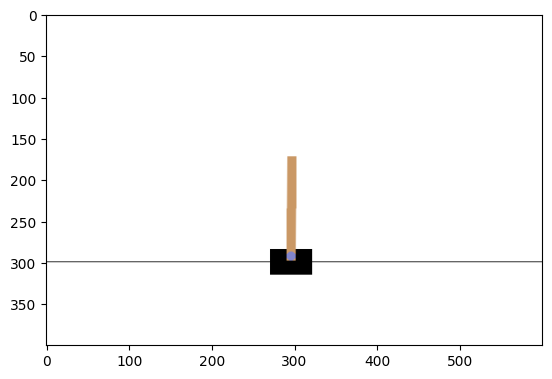

In [3]:
# REference: https://stackoverflow.com/questions/52726475/display-openai-gym-in-jupyter-notebook-only
import matplotlib.pyplot as plt
import gym
from IPython import display
%matplotlib inline

env = gym.make('CartPole-v0',render_mode='rgb_array')
env.reset()

for i in range(25):
   plt.imshow(env.render())
   display.display(plt.gcf())    
   display.clear_output(wait=True)
   env.step(env.action_space.sample()) # take a random action

env.close()

# Mujoco Render

In [ ]:
# REference: https://stackoverflow.com/questions/52726475/display-openai-gym-in-jupyter-notebook-only
import matplotlib.pyplot as plt
import gym
from IPython import display
%matplotlib inline

env = gym.make('HalfCheetah-v2', render_mode="rgb_array")
env.reset()

for i in range(25):
   plt.imshow(env.render())
   display.display(plt.gcf())    
   display.clear_output(wait=True)
   env.step(env.action_space.sample()) # take a random action

env.close()

In [1]:
import mujoco_py

In [2]:
 !MUJOCO_GL=egl

MUJOCO_GL=egl: Command not found.


In [4]:
import gym
from gym.wrappers import RecordVideo

env = RecordVideo(gym.make("CartPole-v1"), "video")

o = env.reset()
for _ in range(100):
    # step() の中で、自動的にビデオ録画されるため、 render() を明示的に呼ぶ必要はない。
    o, r, d, _,_ = env.step(env.action_space.sample())
    if d:
        o = env.reset()

In [5]:
!pwd

/work/marioeduardo-a/github/metaworld/notebooks


In [6]:
import base64
import io
import gym
from gym.wrappers import RecordVideo
from IPython import display
from pyvirtualdisplay import Display

d = Display()
d.start()

env = RecordVideo(gym.make('CartPole-v1'),'./')

o = env.reset()

for _ in range(100):
    o, r, d, i = env.step(env.action_space.sample()) # 本当はDNNからアクションを入れる

    if d:
        env.reset()

for f in env.videos:
    video = io.open(f[0], 'r+b').read()
    encoded = base64.b64encode(video)

    display.display(display.HTML(data="""
        <video alt="test" controls>
        <source src="data:video/mp4;base64,{0}" type="video/mp4" />
        </video>
        """.format(encoded.decode('ascii'))))

FileNotFoundError: [Errno 2] No such file or directory: 'Xvfb'